In [1]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score

# Duomenų tvarkymas

Nusiskaitome surinktus duomenis, naudodamiesi pandas biblioteka. Kadangi ruošiame duomenis regresijos mokymui ir turime žodines reiksmes pakeičiame jas skaitinėmis reikšmėmis.

Taip išmetame mūsų modeliui nereikalinga informacija.

Kainos stulpelyje mūsų duomenyse yra trukstamų reikšmių dėl to jas užpildysime telefonų kainų vidurkiais.

Pasitikriname kaip atrodo mūsų lentelė.

In [2]:
phone = pd.read_csv('data/smartphone_v2.csv', sep=',')

unique_proccesor_names = phone['processor_brand'].unique()
proccesor_mapping = {name: idx for idx, name in enumerate(unique_proccesor_names)}
phone['proccesor_encoded'] = phone['processor_brand'].map(proccesor_mapping)

unique_has_5g_names = phone['has_5g'].unique()
has_5g_mapping = {name: idx for idx, name in enumerate(unique_has_5g_names)}
phone['has_5g_encoded'] = phone['has_5g'].map(has_5g_mapping)

unique_os_names = phone['os'].unique()
os_mapping = {name: idx for idx, name in enumerate(unique_os_names)}
phone['os_encoded'] = phone['os'].map(os_mapping)



phone = phone.drop(['model'], axis=1)
phone = phone.drop(['brand_name'], axis=1)
phone = phone.drop(['resolution'], axis=1)
phone = phone.drop(['processor_brand'], axis=1)
phone = phone.drop(['has_nfc'], axis=1)
phone = phone.drop(['has_ir_blaster'], axis=1)
phone = phone.drop(['num_cores'], axis=1)
phone = phone.drop(['processor_speed'], axis=1)
phone = phone.drop(['refresh_rate'], axis=1)
phone = phone.drop(['num_rear_cameras'], axis=1)
phone = phone.drop(['num_front_cameras'], axis=1)
phone = phone.drop(['extended_upto'], axis=1)
phone = phone.drop(['fast_charging'], axis=1)
phone = phone.drop(['os'], axis=1)
phone = phone.drop(['has_5g'], axis=1)
phone = phone.drop(['ram_capacity'], axis=1)
phone = phone.drop(['extended_memory_available'], axis=1)
phone = phone.drop(['rating'], axis=1)




phone = phone.dropna()

phone['price']= phone['price'].fillna(phone['price'].mean())

phone.head()


,price,battery_capacity,fast_charging_available,internal_memory,screen_size,primary_camera_rear,primary_camera_front,proccesor_encoded,has_5g_encoded,os_encoded
0,54999,5000.0,1,256.0,6.70,50.0,16.0,0,0,0
1,19989,5000.0,1,128.0,6.59,64.0,16.0,0,0,0
2,16499,5000.0,1,64.0,6.60,50.0,13.0,1,0,0
3,14999,5000.0,1,128.0,6.55,50.0,16.0,0,0,0
4,24999,5000.0,1,128.0,6.70,108.0,16.0,2,0,0


# Modeliai

Norint surasti geriausiai mums tinkantį modelį naudosime:

1.RandomForestRegressor

2.GradientBoostingRegressor

3.LogisticRegresion su PolymonialFeatures

4.LinearRegression

In [39]:
# ---------------------RANDOM FOREST REGRESSOR MODEL-------------------------
X = phone.drop(['price'], axis=1)
Y = phone['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=10, min_samples_split= 5 , n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_RandomForestRegressor = r2_score(y_test, y_pred)
mse_RandomForestRegressor = mean_squared_error(y_test, y_pred)

print(f'r2 rez: {r2_RandomForestRegressor}, MSE rez:{mse_RandomForestRegressor}')


joblib.dump(model, 'RandomForestRegression_model.joblib')

r2 rez: 0.8118767529889782, MSE rez:138743930.94072485


['RandomForestRegression_model.joblib']

In [42]:
# ---------------------GradientBoostingRegressor-------------------------
X = phone.drop(['price'], axis=1)
Y = phone['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
reg = GradientBoostingRegressor()
reg.fit(X, Y)

reg.predict(X_test)

reg_score_GradientBoostingRegressor = reg.score(X_test, y_test)

mse_GradientBoostingRegressor = mean_squared_error(y_pred, y_test)
print(f'r2 rez: {reg_score_GradientBoostingRegressor}, MSE rez:{mse_GradientBoostingRegressor}')


r2 rez: 0.9140335230233277, MSE rez:1350205036.3599837


In [7]:
# ---------------------LOGISTIC REGRESSION WITH POLYMONIAL FEATURES MODEL-------------------------

polynomia = PolynomialFeatures(degree=2)
X_poly = polynomia.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=11)

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_LogisticRegressionPolymonial = r2_score(y_test, y_pred)
mse_LogisticRegressionPolymonial =  mean_squared_error(y_pred, y_test)
print(f'r2 rez: {r2_LogisticRegressionPolymonial}, MSE rez:{mse_LogisticRegressionPolymonial}')


r2 rez: 0.6730805999480174, MSE rez:271571967.4352332


In [18]:
# ---------------------LINEAR REGRESSION MODEL-------------------------

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=11)


scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_LinearRegression = r2_score(y_test, y_pred)
mse_LinearRegression =  mean_squared_error(y_pred, y_test)
print(f'r2 rez: {r2_LinearRegression}, MSE rez:{mse_LinearRegression}')



r2 rez: 0.4297744402942799, MSE rez:473686410.4929715


# Geriausių hyper parametrų ieškojimas

Patikrine visus modelius matome, kad geriausi rezultatai yra RandomForestRegressor ir GradientBoostRegressor, bandysime surasti geriausius rezultatus jų našumui padidinti.

In [43]:
# ---------------------GridSearchCV MODEL-------------------------
model_RandForest = RandomForestRegressor()

model_GradientBoosting = GradientBoostingRegressor()

random_param_grid = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],

}

gradient_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],

}



grid_search_randF = GridSearchCV(estimator=model_RandForest, param_grid=random_param_grid, cv=5, scoring='r2')
grid_search_randF.fit(X,Y)

grid_search_GradientB = GridSearchCV(estimator=model_GradientBoosting, param_grid= gradient_param_grid, cv=5, scoring='r2')
grid_search_GradientB.fit(X,Y)


print(f'Geriausi parametrai Random Forest Regressor: {grid_search_randF.best_params_}')
print(f'Geriausias tikslumas Random Forest Regressor: {grid_search_randF.best_score_}')

print(f'Geriausi parametrai Gradient Boosting Regressor: {grid_search_GradientB.best_params_}')
print(f'Geriausias tikslumas Gradient Boosting Regressor: {grid_search_GradientB.best_score_}')

Geriausi parametrai Random Forest Regressor: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
Geriausias tikslumas Random Forest Regressor: 0.4902842729414355
Geriausi parametrai Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Geriausias tikslumas Gradient Boosting Regressor: 0.4324440902046782


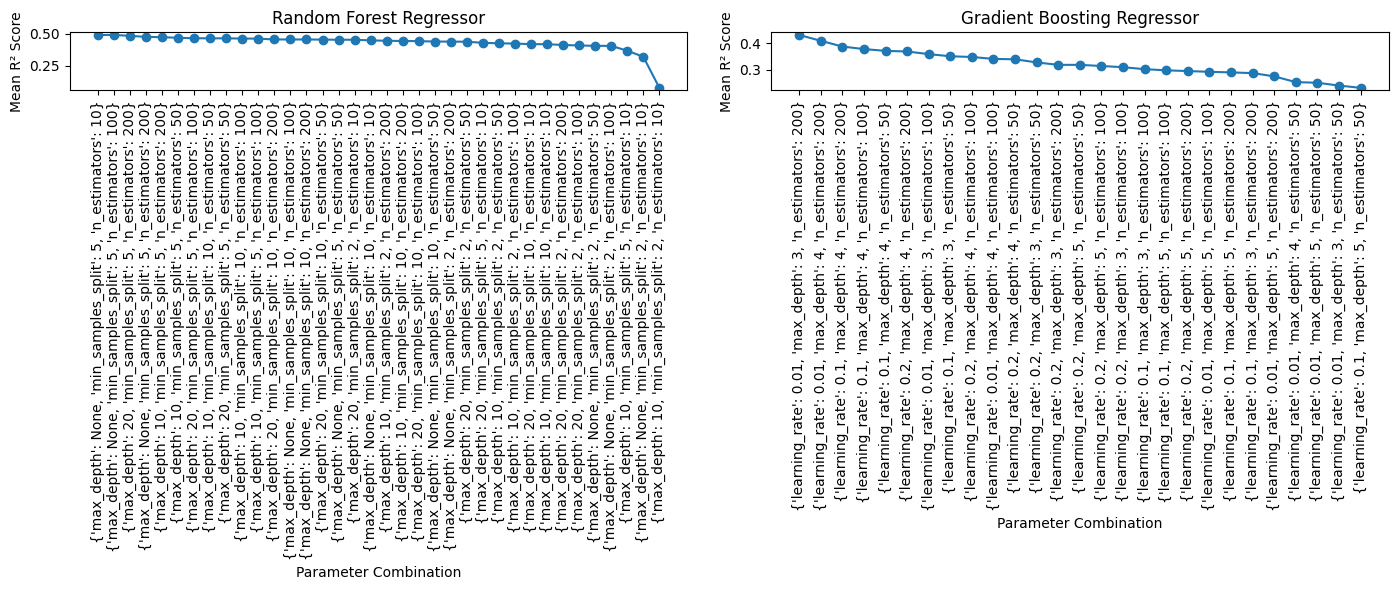

In [44]:
randF_results = pd.DataFrame(grid_search_randF.cv_results_)
randF_results['param_combination'] = randF_results.params.apply(lambda x: str(x))
randF_results = randF_results.sort_values('mean_test_score', ascending=False)


GradientB_results = pd.DataFrame(grid_search_GradientB.cv_results_)
GradientB_results['param_combination'] = GradientB_results.params.apply(lambda x: str(x))
GradientB_results = GradientB_results.sort_values('mean_test_score', ascending=False)


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].plot(randF_results['param_combination'], randF_results['mean_test_score'], marker='o')
ax[0].set_title('Random Forest Regressor')
ax[0].set_xlabel('Parameter Combination')
ax[0].set_ylabel('Mean R² Score')
ax[0].tick_params(axis='x', rotation=90)


ax[1].plot(GradientB_results['param_combination'], GradientB_results['mean_test_score'], marker='o')
ax[1].set_title('Gradient Boosting Regressor')
ax[1].set_xlabel('Parameter Combination')
ax[1].set_ylabel('Mean R² Score')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Grafiko braižymas

Kad galėtume palyginti viusų keturių modelių rezultatus. Naudosime matplotlyb biblioteka, nusibraižysime grafiką ir vizualiai pamatysime, kaip gerai ar blogai šie modeliai buvo išmokinti.

C:\Users\sarun\AppData\Local\Temp\ipykernel_26616\1375061879.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(regression_labels, rotation=45)
C:\Users\sarun\AppData\Local\Temp\ipykernel_26616\1375061879.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(regression_labels, rotation=45)


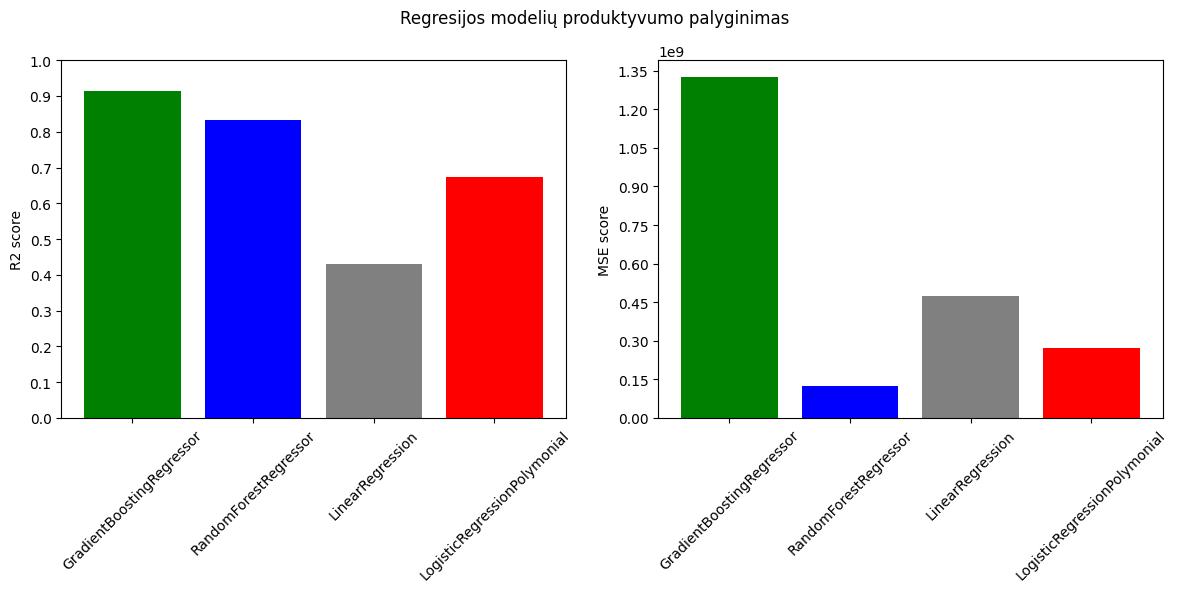

In [109]:
regression_labels = ['GradientBoostingRegressor','RandomForestRegressor','LinearRegression','LogisticRegressionPolymonial']
regression_models_r2 = [reg_score_GradientBoostingRegressor,r2_RandomForestRegressor,r2_LinearRegression,r2_LogisticRegressionPolymonial]
regression_models_mse = [mse_GradientBoostingRegressor, mse_RandomForestRegressor, mse_LinearRegression, mse_LogisticRegressionPolymonial]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Regresijos modelių produktyvumo palyginimas')
ax1.bar(regression_labels, regression_models_r2, color=['green', 'blue', 'grey', 'red'])
ax1.set_ylabel('R2 score')
ax1.set_yticks([i * 0.1 for i in range(11)])
ax1.set_xticklabels(regression_labels, rotation=45)


ax2.bar(regression_labels, regression_models_mse, color=['green', 'blue', 'grey', 'red'])
ax2.set_ylabel('MSE score')
yticks_mse = plt.MaxNLocator(nbins=10).tick_values(min(regression_models_mse), max(regression_models_mse))
ax2.set_yticks(yticks_mse)
ax2.set_xticklabels(regression_labels, rotation=45)

plt.tight_layout()
plt.show()

# Išvados

Išmokinus šiuos modelius galime pasidaryti keleta išvadų:

Gradient boosting regressor - parodė dižiausia r2 rezultatą (91%), bet tuo pačiu ir didžiausią klaidos tikimybę iš visų keturių modelių, dėl to šį modelį rinktis gerokai rizikingiau.

Random forest regressor - parodė 8% procentais žemesnį r2 rezultatą (83%) už gradient boost, tačiau jo klaidos tikimybė yra žemiausia iš visų keturių modelių. Lygininat su Gradient boost modeliu, mes prarandame 8% tikslumo, bet daugiau negu septynis kartus sumažianm klaidos tikimybes.

Linear regression - parodė žemą r2 rezultatą (42%) ir žemesne negu vidutinę klaidos tikimybę. Dėl to šis modelis šiam konkrečia projektui nėra nepats tinamiausias.

Logistic regression su polymonial features - parodė aukštesnį už vidutinį r2 rezultatą (67%) ir klaidos tikimybė lyginant su gradient boost ir linear regresion yra gerokai mažesnė 

Įvertinus keturis, skirtingus modelius pamatėme, kad kainai nuspėti buvo tinkamiausias "Random forest regression" dėl santykio tarp "R2" ir "MSE" surinktų taškų.